# 6.6. WHR_Sourcing & Analyzing Time Series Data

## This script contains the following points:

### 1. Importing your libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data
### 3. Line charts
### 4. Time series analysis: decomposition
### 5. Dickey-Fuller Test
### 6. Differencing
### 7. Autocorrelation

# 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how my plots will appear.

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'ySmp4-RN1bBWMAxx1q1x'

In [3]:
# Importing the Federal Reserve Economic Data "Gross Domestic Product" variable.

data = quandl.get('FRED/GDP')

In [4]:
data.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [5]:
data.shape

(300, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

# 2. Subsetting, wrangling, and cleaning time-series data

In [8]:
# Reset index so that the "Date" column can be used as a filter

data_2 = data.reset_index()

In [9]:
data_2

,Date,Value
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
295,2020-10-01,21477.597
296,2021-01-01,22038.226
297,2021-04-01,22740.959
298,2021-07-01,23202.344


In [10]:
data_sub = data_2.loc[(data_2['Date'] >= '2011-01-01') & (data_2['Date'] < '2021-01-01')]

In [11]:
data_sub.shape

(40, 2)

In [12]:
data_sub.head()

,Date,Value
256,2011-01-01,15351.444
257,2011-04-01,15557.535
258,2011-07-01,15647.681
259,2011-10-01,15842.267
260,2012-01-01,16068.824


In [13]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2011-01-01,15351.444
2011-04-01,15557.535
2011-07-01,15647.681
2011-10-01,15842.267
2012-01-01,16068.824


###  Subset: Explain what logic you were following when selecting your data points

1. **Primary Focus on 2019**: My study centers around the year 2019 as the core period for analyzing world happiness and associated factors.

2. **Broader Context**: Extending the dataset to 2021 allows for a broader understanding of trends, including the impact of events like the COVID-19 pandemic.

3. **COVID-19 Consideration**: While 2019 is the main focus, including post-2019 data acknowledges the pandemic's impact on global economies.

4. **Longitudinal Analysis**: Examining data from 2011 to 2021 enables a longitudinal analysis of GDP trends, capturing pre-pandemic, pandemic, and post-pandemic periods.


# 3. Line charts

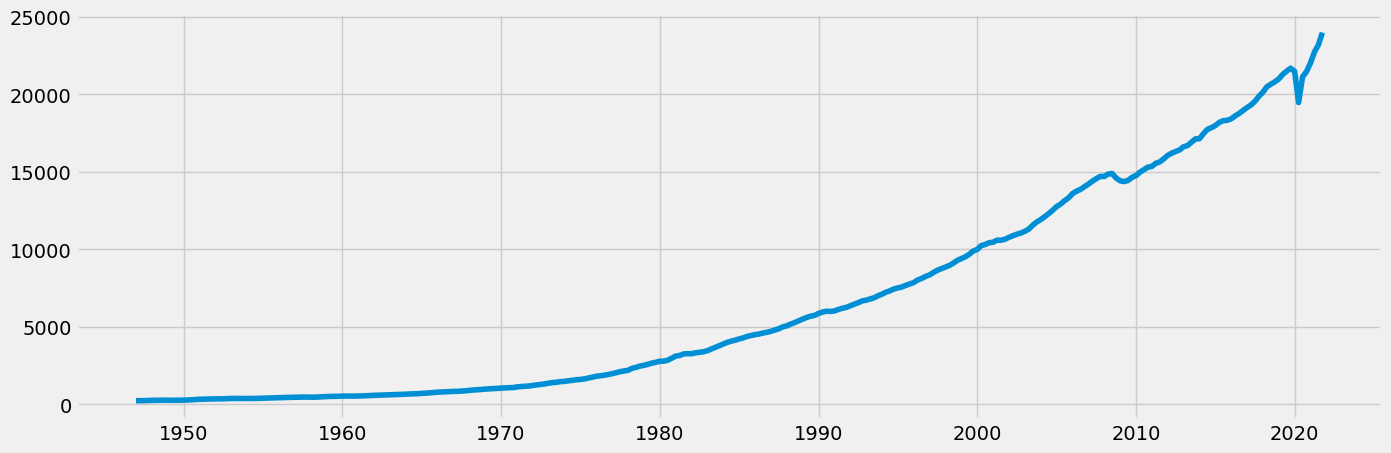

In [14]:
# Plot the original data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

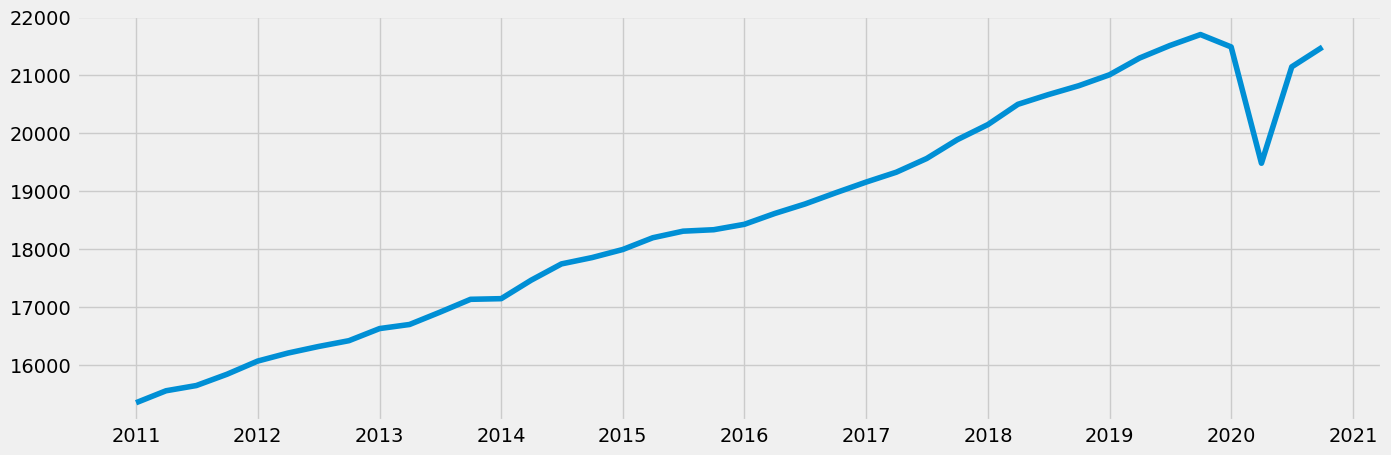

In [15]:
# Plot the new data subset

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [16]:
# Check for missing values

data_sub.isnull().sum() 

Value    0
dtype: int64

In [17]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()


0

#### No duplicates

# 4. Time series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

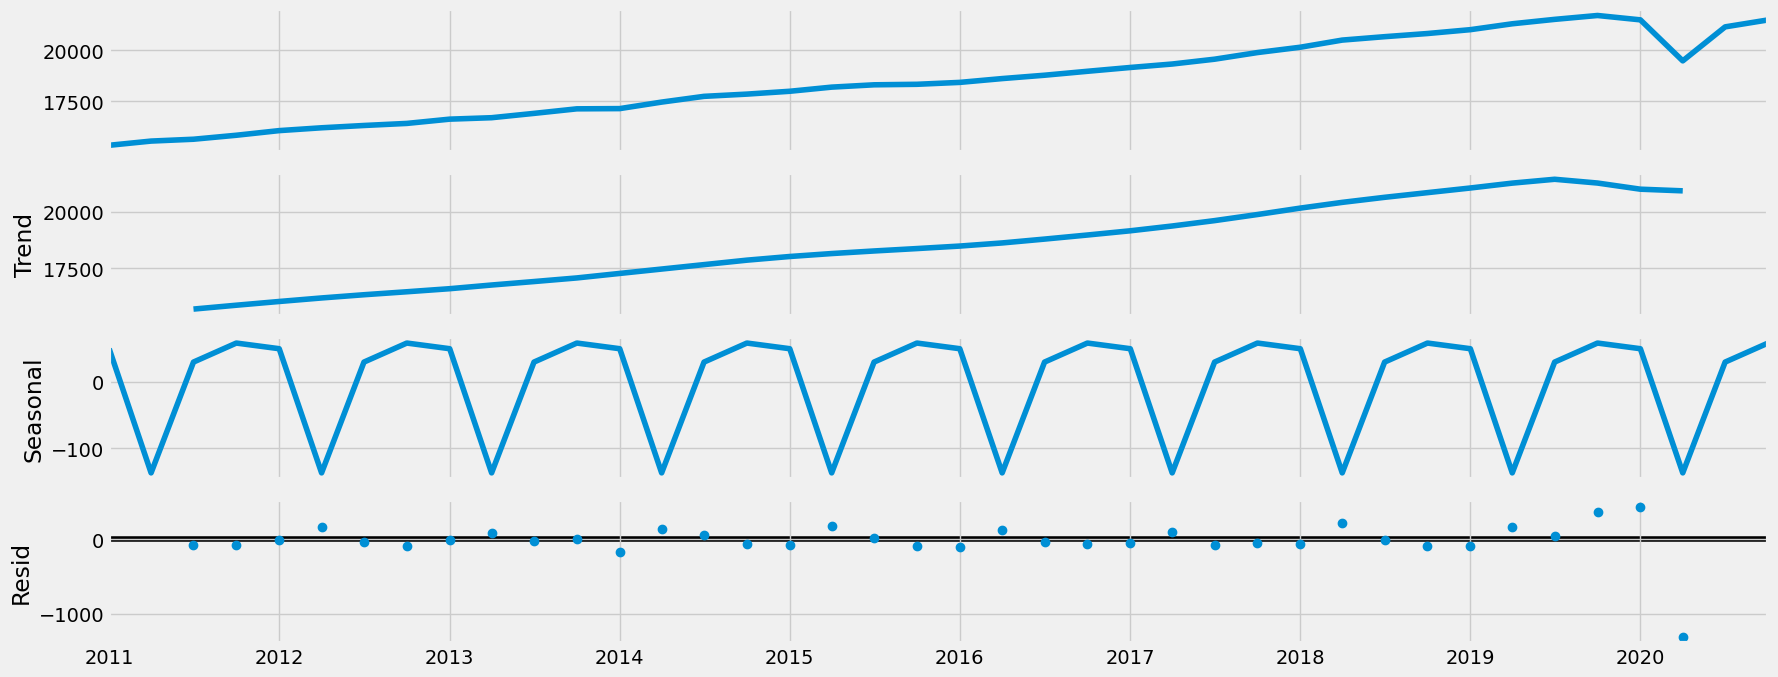

In [20]:
# Plot the separate components

decomposition.plot()

# Save the figure as a PNG file
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/decomposition.png")

plt.show()

### Analyze the results from the plot

1. **Underlying Trend**: Over the period from 2011 to 2020, the GDP data exhibits a consistent upward trend, reflecting overall economic growth and development. However, starting from 2020, there is a notable and abrupt decline in GDP, which can be attributed to the widespread impact of the COVID-19 pandemic. This decline underscores the significant economic disruptions caused by the pandemic, including lockdown measures, supply chain disruptions, and decreased consumer spending. It also highlights the importance of considering external factors such as global health crises when analyzing economic data.

2. **Seasonality**: The presence of seasonality in the data indicates that GDP experiences periodic fluctuations over the course of each year. These fluctuations may be influenced by various factors such as seasonal variations in economic activity, agricultural output, and consumer behavior. Understanding the seasonal patterns in GDP can provide valuable insights for policymakers and businesses, allowing them to anticipate and prepare for recurring trends in economic performance.

3. **Residual Component**: The residual component, representing the variation in GDP that is not accounted for by the trend or seasonal factors, exhibits minimal fluctuations close to zero. This suggests that the residual component is relatively small and does not contribute significantly to overall variability in GDP. Consequently, there may be little need for further investigation into the residual component, as it is unlikely to substantially impact the interpretation of the data. However, it is essential to remain vigilant for any unexpected or anomalous patterns in the residual component that may warrant closer scrutiny and analysis.

# 5. Dickey-Fuller Test

In [21]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller

# Define the function
def dickey_fuller(timeseries):    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.105374
p-value                         0.966426
Number of Lags Used            10.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


### Interpretation of the results and project null hypothesis

Since the test statistic of 0.105374 is greater than the critical values at all significance levels, the null hypothesis cannot be rejected, which suggests that the data is **non-stationary**.

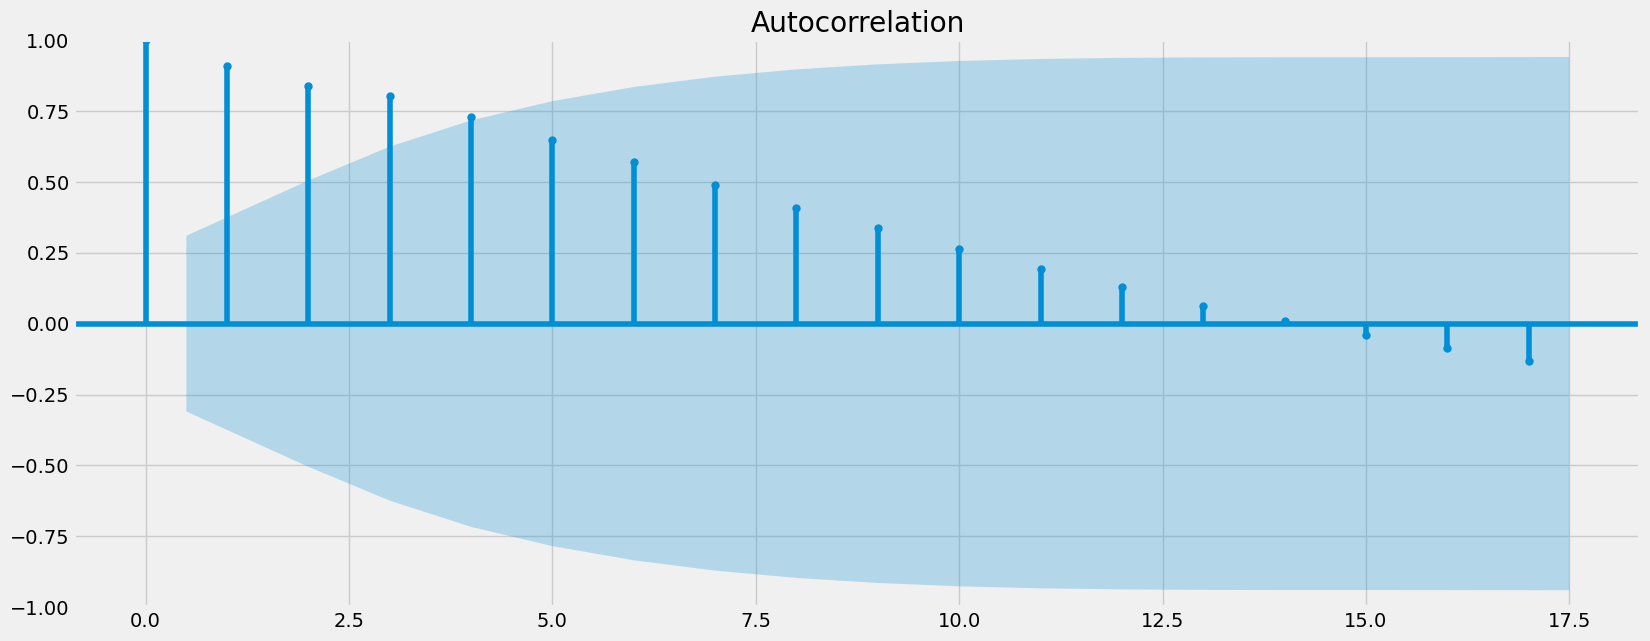

In [22]:
# Import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)

# Save the figure as a PNG file
plt.savefig("/Users/pau/10-06-2024 World Happiness Report/04 Analysis/Visualizations/autocorrelation_before_diff.png")

plt.show()

# 6. Differencing

In [23]:
# Turn the observation to t-1, making the whole thing t - (t -1)

data_diff = data_sub - data_sub.shift(1) 

In [24]:
# Remove the missing values resulted from differencing

data_diff.dropna(inplace = True)

In [25]:
data_diff.head()

,Value
datetime,
2011-04-01,206.091
2011-07-01,90.146
2011-10-01,194.586
2012-01-01,226.557
2012-04-01,138.306


In [26]:
data_diff.columns

Index(['Value'], dtype='object')

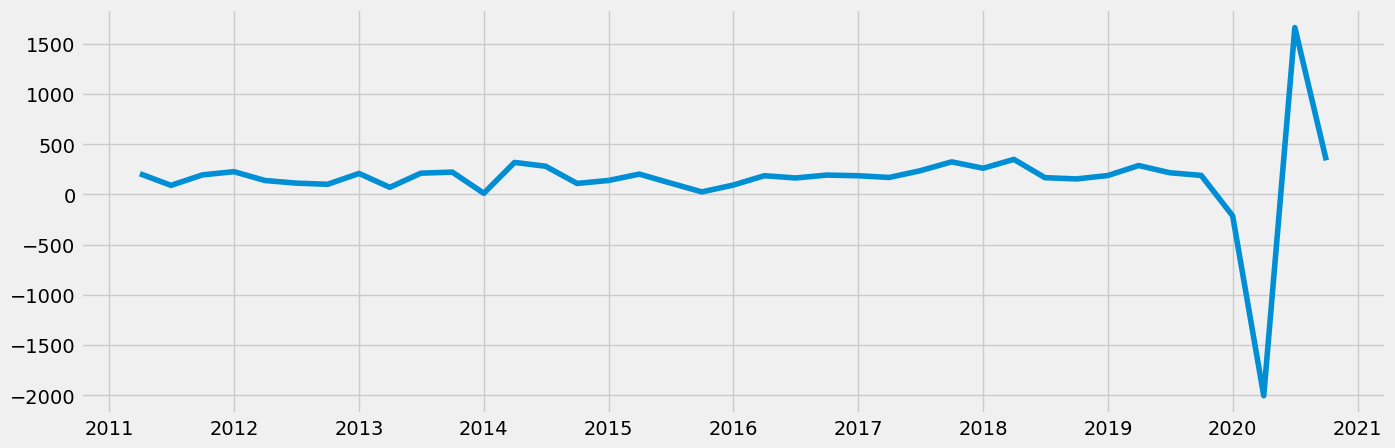

In [27]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.532471
p-value                         0.007191
Number of Lags Used             9.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


### Interpretation
Since the test statistic of -3.532471 is less than the critical values at all significance levels, and the p-value of 0.007191 is less than 0.05, the null hypothesis can be rejected. Therefore, it can be concluded that the time series is **stationary**. 
This suggests that differencing has removed trends and seasonality from the data.

# 7. Autocorrelation

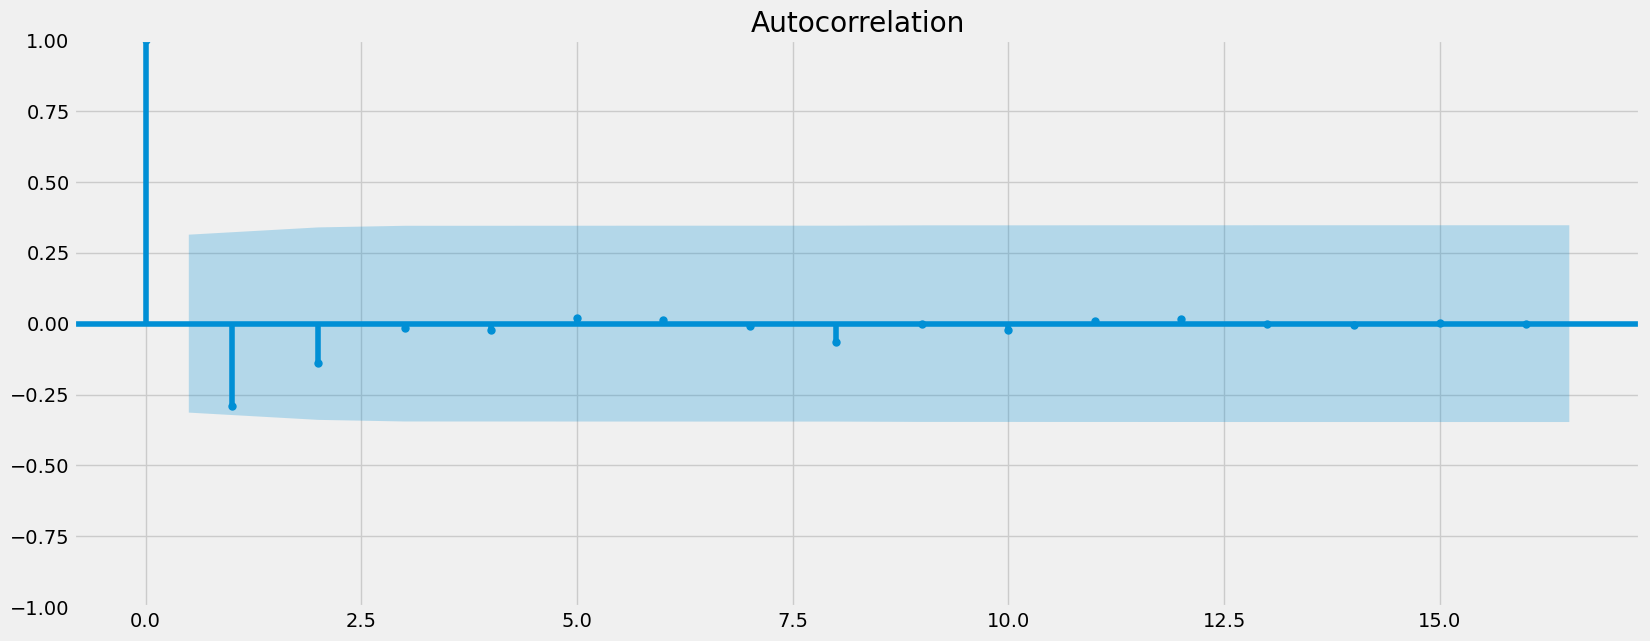

In [29]:
# Import the autocorrelation and partial correlation plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_diff)
plt.show()